In [145]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
import datetime
import operator 
%matplotlib inline
import seaborn as sns

In [146]:
df = pd.read_csv('covid-data.csv')

In [147]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49878 entries, 0 to 49877
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         49590 non-null  object 
 1   continent                        49302 non-null  object 
 2   location                         49878 non-null  object 
 3   date                             49878 non-null  object 
 4   total_cases                      49242 non-null  float64
 5   new_cases                        49018 non-null  float64
 6   new_cases_smoothed               48236 non-null  float64
 7   total_deaths                     49242 non-null  float64
 8   new_deaths                       49018 non-null  float64
 9   new_deaths_smoothed              48236 non-null  float64
 10  total_cases_per_million          48954 non-null  float64
 11  new_cases_per_million            48954 non-null  float64
 12  new_cases_smoothed

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN


In [148]:
df.drop(df.columns[[-1, 0]], axis=1, inplace=True)
df.head()

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,18.733,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
1,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,NaN,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
2,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,37.465,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
3,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,NaN,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
4,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,NaN,...,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29


In [149]:
df.isnull().sum(axis = 0)

continent                            576
location                               0
date                                   0
total_cases                          636
new_cases                            860
new_cases_smoothed                  1642
total_deaths                         636
new_deaths                           860
new_deaths_smoothed                 1642
total_cases_per_million              924
new_cases_per_million                924
new_cases_smoothed_per_million      1707
total_deaths_per_million             924
new_deaths_per_million               924
new_deaths_smoothed_per_million     1707
new_tests                          31837
total_tests                        31412
total_tests_per_thousand           31412
new_tests_per_thousand             31837
new_tests_smoothed                 29447
new_tests_smoothed_per_thousand    29447
tests_per_case                     31069
positive_rate                      30607
tests_units                        28590
stringency_index

In [150]:
#selecting required features only
features_mean = ['location','total_cases', 'total_deaths', 'new_deaths', 'total_tests', 'positive_rate', 'population_density', 'diabetes_prevalence']
print(features_mean)

['location', 'total_cases', 'total_deaths', 'new_deaths', 'total_tests', 'positive_rate', 'population_density', 'diabetes_prevalence']


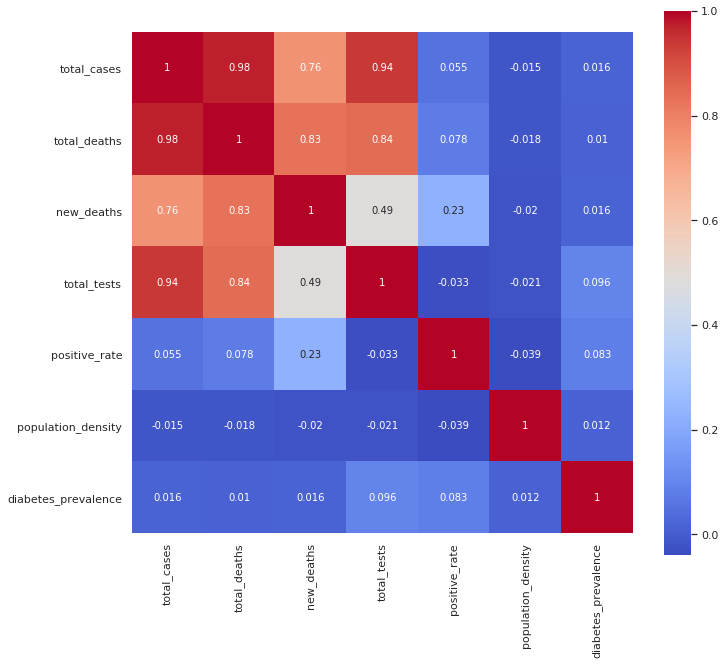

In [151]:
#heat map of the correlations between the features.
plt.figure(figsize=(10,10))
sns.heatmap(df[features_mean].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

# Nepal's data analysis

In [161]:
Nepal_data = df.loc[df['location']=='Nepal']
Nepal_data.head()

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
34594,Asia,Nepal,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,3.212,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78
34595,Asia,Nepal,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,3.212,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78
34596,Asia,Nepal,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,3.212,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78
34597,Asia,Nepal,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,3.212,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78
34598,Asia,Nepal,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,3.212,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78


In [163]:
Nepal_data.fillna(Nepal_data.mean())

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
34594,Asia,Nepal,2019-12-31,0.0,0.0,359.473667,0.0,0.0,2.140826,0.000,...,3.212,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78
34595,Asia,Nepal,2020-01-01,0.0,0.0,359.473667,0.0,0.0,2.140826,0.000,...,3.212,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78
34596,Asia,Nepal,2020-01-02,0.0,0.0,359.473667,0.0,0.0,2.140826,0.000,...,3.212,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78
34597,Asia,Nepal,2020-01-03,0.0,0.0,359.473667,0.0,0.0,2.140826,0.000,...,3.212,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78
34598,Asia,Nepal,2020-01-04,0.0,0.0,359.473667,0.0,0.0,2.140826,0.000,...,3.212,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34877,Asia,Nepal,2020-10-09,98617.0,4364.0,2698.429000,590.0,12.0,11.571000,3384.619,...,3.212,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78
34878,Asia,Nepal,2020-10-10,100676.0,2059.0,2603.714000,600.0,10.0,11.429000,3455.286,...,3.212,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78
34879,Asia,Nepal,2020-10-11,105684.0,5008.0,3016.286000,614.0,14.0,12.286000,3627.165,...,3.212,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78
34880,Asia,Nepal,2020-10-12,107755.0,2071.0,2990.286000,636.0,22.0,14.429000,3698.243,...,3.212,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78


In [170]:
Nepal_data.isna().sum()

continent                           0
location                            0
date                                0
total_cases                        13
new_cases                          13
new_cases_smoothed                  6
total_deaths                       13
new_deaths                         13
new_deaths_smoothed                 6
total_cases_per_million            13
new_cases_per_million              13
new_cases_smoothed_per_million      6
total_deaths_per_million           13
new_deaths_per_million             13
new_deaths_smoothed_per_million     6
new_tests                          67
total_tests                        54
total_tests_per_thousand           54
new_tests_per_thousand             67
new_tests_smoothed                 37
new_tests_smoothed_per_thousand    37
tests_per_case                     86
positive_rate                      37
tests_units                        30
stringency_index                    6
population                          0
population_d

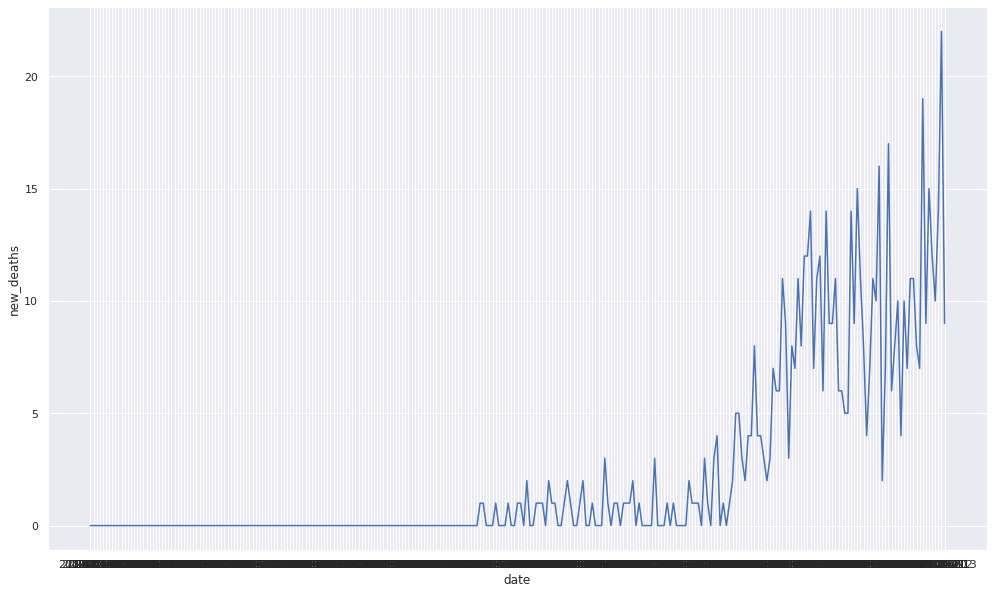

In [168]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x='date',y='new_deaths',data = Nepal_data)
plt.show()

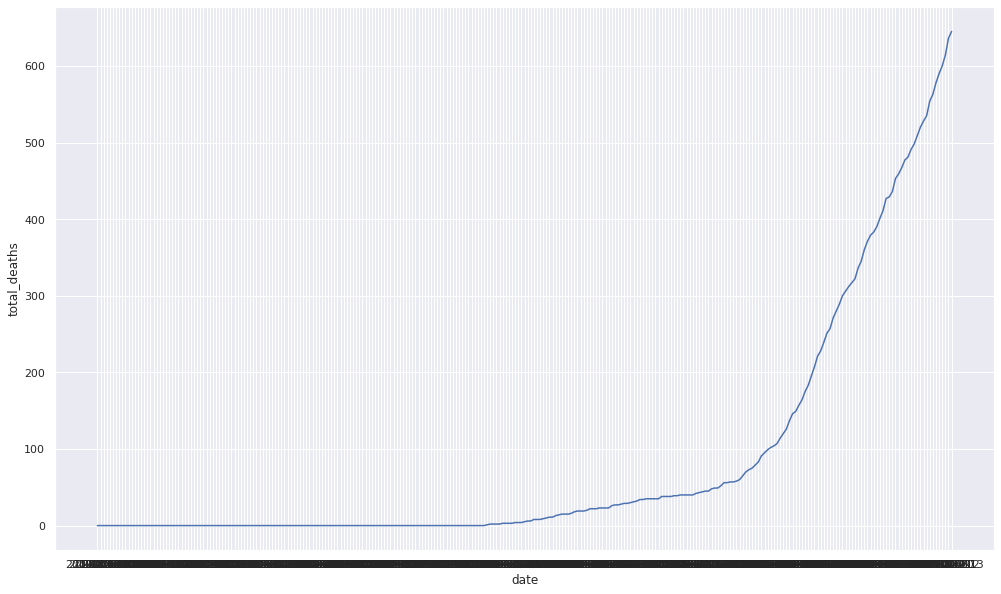

In [169]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x='date',y='total_deaths',data = Nepal_data)
plt.show()

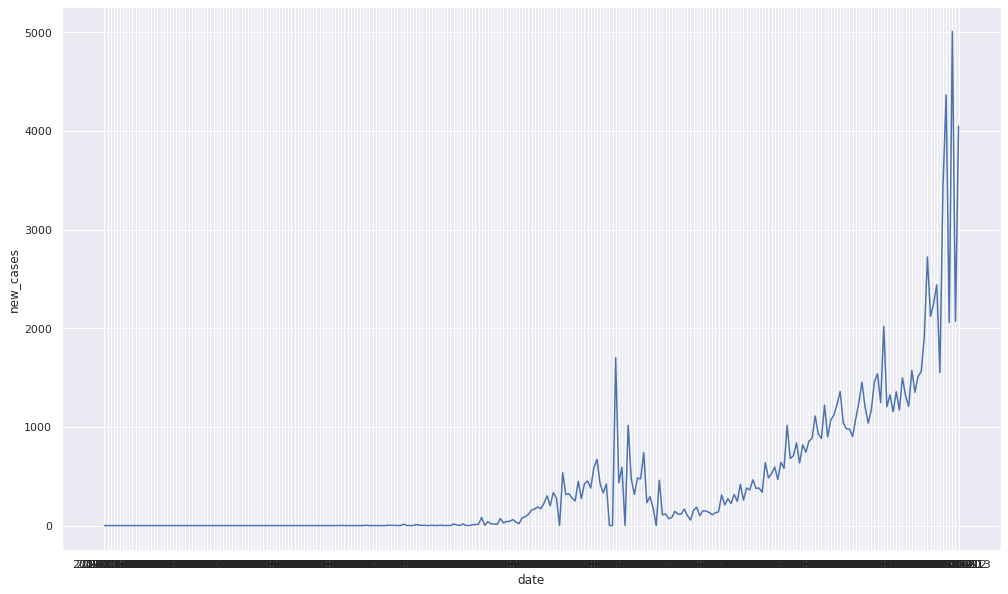

In [175]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x='date',y='new_cases',data = Nepal_data)
plt.show()

In [ ]:
nepal = Nepal_data.fillna(0)

In [189]:
Y = nepal['total_deaths']  
X = nepal['total_cases']

In [190]:
x = X.to_numpy()
y = Y.to_numpy()

In [191]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [192]:
from sklearn.linear_model import LinearRegression 
lin = LinearRegression() 

lin.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

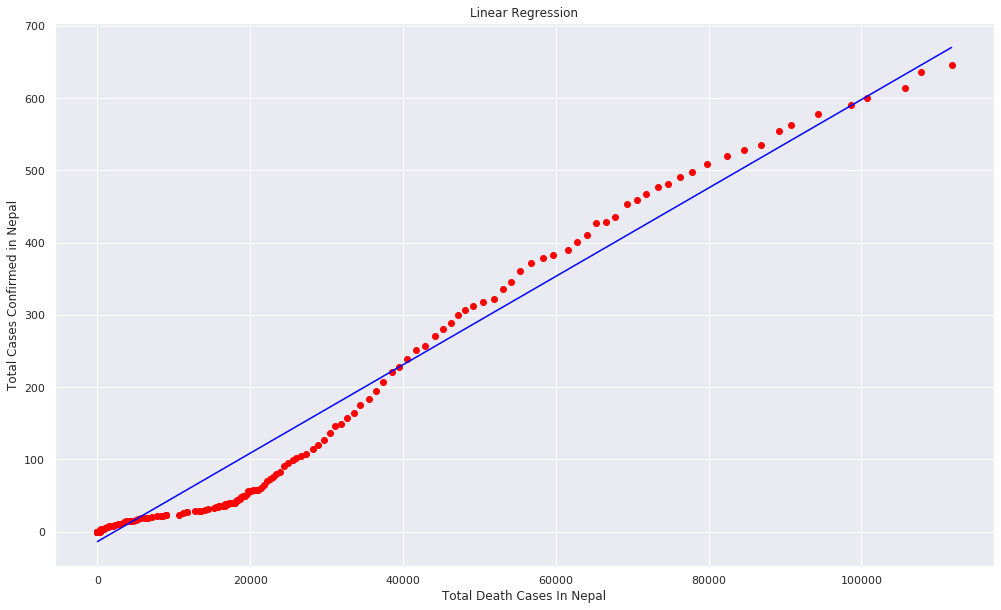

In [193]:
plt.scatter(x, y, color = 'Red') 

plt.plot(x, lin.predict(x), color = 'Blue') 
plt.title('Linear Regression') 
plt.xlabel('Total Death Cases In Nepal') 
plt.ylabel('Total Cases Confirmed in Nepal') 

plt.show()